# **Metabolic Syndrome Prediction**
### **Machine Learning**

Cameron Peace


## **Project Description**

***To predict metabolic syndrome, yes or no, based on common risk factors***

### Data Background

* The dataset can be found [here](https://data.world/informatics-edu/metabolic-syndrome-prediction) on data.world.
> The dataset for analysis came from the NHANES initiative where the following variables were combined from multiple tables with SQL: abnormal waist circumference, triglycerides above 150, HDL cholesterol below 50 in women or 40 in men, history of hypertension and mildly elevated fasting blood sugar (100-125). Numerous other variables were added, such as uric acid, race, income, etc.
* From CDC website: More information on [NHANES](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm) 
> The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.
* It is not clear from the description on data.world when the data were collected and what regions or demographic groups the individuals in the study represent.
* It was uploaded to data.world by Robert Hoyt MD on July 22nd, 2019.

### Metabolic Syndrome Background

From Mayo Clinic:

>***"Metabolic syndrome is a cluster of conditions that occur together, increasing your risk of heart disease, stroke and type 2 diabetes."***

>**Diagnosis:**
The National Institutes of Health guidelines define metabolic syndrome as having three or more of the following traits, including traits for which you may be taking medication to control:
>* **Large waist** — A waistline that measures at least 35 inches (89 centimeters) for women and 40 inches (102 centimeters) for men
>* **High triglyceride level** — 150 milligrams per deciliter (mg/dL), or 1.7 millimoles per liter (mmol/L), or higher of this type of fat found in blood
>* **Reduced "good" or HDL cholesterol** — Less than 40 mg/dL (1.04 mmol/L) in men or less than 50 mg/dL (1.3 mmol/L) in women of high-density lipoprotein (HDL) cholesterol
>* **Increased blood pressure — 130/85 millimeters of mercury (mm Hg) or higher** &emsp; <font color='darkorange'>*(Not present in this dataset)*
>* **Elevated fasting blood sugar** — 100 mg/dL (5.6 mmol/L) or higher
    
  

### **Data Dictionary**

* ***seqn*** -- integer  --  Likely 'sequence number', old index column
* ***age*** -- integer  --  age
* ***sex*** -- string  --  sex
* ***marital*** -- string  --  marital status
* ***income*** -- integer  --  monthly income
* ***race***  --  string  --  ethnicity
* ***waistcirc***  --  decimal  --  waist circumference in cm
* ***bmi***  --  decimal  --  body mass index
* ***albuminuria***  --  integer  -- Albuminuria stage. Albuminuria is a sign of kidney disease and means that you have too much albumin in your urine
* ***uralbcr***  --  decimal  --  Urine Albumin-Creatinine ratio
* ***uricacid***  --  decimal  --  uric acid level
* ***bloodglucose***  --  integer  --  blood glucose level mg/dL
* ***hdl***  --  integer  --  HDL (High-Density Lipoprotein) level mg/dL
* ***triglycerides***  --  integer  --  triglycerides level mg/dL
* ***metabolicsyndrome***  --  string  --  	Whether the patient suffers from metabolic syndrome or not

### Import Libraries

In [2]:
# warnings
import warnings
warnings.filterwarnings('ignore') # suppressing non useful warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # suppresses non helpful tf warning
# Analysis, Plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ML
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             classification_report, ConfusionMatrixDisplay)
# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# Display settings
pd.options.display.float_format = '{:,.3f}'.format

## **1. Load and inspect the data**

### Load the Data

In [3]:
# Load Data
df = pd.read_csv('Metabolic  Syndrome.csv')

# Making a back up for reference
df_original = df.copy()

### Inspect the Data

In [4]:
# Display a sample of rows from the data
df.sample(5)

seqn  Age     Sex   Marital    Income   Race  WaistCirc    BMI  \
950   66026   65    Male  Divorced 9,000.000  White    121.300 36.300   
2004  70292   48  Female   Married 6,200.000  Black     97.800 31.000   
2143  70842   32    Male    Single       NaN  Asian     71.400 17.800   
828   65505   55    Male   Married 9,000.000  Asian     87.000 22.400   
2063  70514   22  Female       NaN   300.000  White    111.500 33.300   

      Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
950             0    4.100     6.500           110   52            123   
2004            0    5.950     5.900           111   53            173   
2143            1   58.620     8.200            84   38             95   
828             0    5.280     5.200           144   59            160   
2063            0    7.400     6.500           115   37             99   

     MetabolicSyndrome  
950             MetSyn  
2004            MetSyn  
2143         No MetSyn  
828          No MetSyn  
2063            MetSyn

In [5]:
# View shape, data types, summary statistics, and column names for easy copy/paste
display(df.info(), df.describe().T, df.describe(include='object'), df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


None

count       mean       std        min        25%        50%  \
seqn          2,401.000 67,030.674 2,823.565 62,161.000 64,591.000 67,059.000   
Age           2,401.000     48.692    17.633     20.000     34.000     48.000   
Income        2,284.000  4,005.254 2,954.032    300.000  1,600.000  2,500.000   
WaistCirc     2,316.000     98.307    16.253     56.200     86.675     97.000   
BMI           2,375.000     28.702     6.662     13.400     24.000     27.700   
Albuminuria   2,401.000      0.154     0.423      0.000      0.000      0.000   
UrAlbCr       2,401.000     43.626   258.273      1.400      4.450      7.070   
UricAcid      2,401.000      5.489     1.439      1.800      4.500      5.400   
BloodGlucose  2,401.000    108.248    34.821     39.000     92.000     99.000   
HDL           2,401.000     53.369    15.186     14.000     43.000     51.000   
Triglycerides 2,401.000    128.125    95.322     26.000     75.000    103.000   

                     75%        max  
seqn          69,495.000 71,915.000  
Age               63.000     80.000  
Income         6,200.000  9,000.000  
WaistCirc        107.625    176.000  
BMI               32.100     68.700  
Albuminuria        0.000      2.000  
UrAlbCr           13.690  5,928.000  
UricAcid           6.400     11.300  
BloodGlucose     110.000    382.000  
HDL               62.000    156.000  
Triglycerides    150.000  1,562.000

Sex  Marital   Race MetabolicSyndrome
count     2401     2193   2401              2401
unique       2        5      6                 2
top     Female  Married  White         No MetSyn
freq      1211     1192    933              1579

Index(['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

<u><mark>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
Initial Observations:
* <font color='dodgerblue' size=4> <i>We appear to have missing values in at least 4 columns
* <font color='dodgerblue' size=4> <i>'seqn' is an old index and will be dropped
* <font color='dodgerblue' size=4> <i>The waist measurement appears to be in cm based on the mean & IQR, and some research on appropriate ranges
* <font color='dodgerblue' size=4> <i>The majority of these patients are overweight
* <font color='dodgerblue' size=4> <i>It looks like albuminuria may have 3 stages: 0, 1, & 2
* <font color='dodgerblue' size=4> <i>We have a massive outlier in 'UrAlbCr that is likely an error
* <font color='dodgerblue' size=4> <i>We have a similar such entry in 'Tryiglycerides' that is likely an error
</i></font>

## **2. Clean the Data**

### Inspect Column Names for Errors and Adjust to snake_case if Necessary


In [6]:
# Display column names
df.columns

Index(['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

In [7]:
# Adjusting column names with a function
def adjust_column_names(name):
  new_name = ''
  for i in name:
    if i.isupper() and len(name) > 3:
      new_name += '_' + i.lower()
    elif len(name) <= 4:
      new_name = name.lower()
    else:
      new_name += i
  return new_name.strip('_')

df = df.rename(columns = lambda x: adjust_column_names(x))
df.columns

Index(['seqn', 'age', 'sex', 'marital', 'income', 'race', 'waist_circ', 'bmi',
       'albuminuria', 'ur_alb_cr', 'uric_acid', 'blood_glucose', 'hdl',
       'triglycerides', 'metabolic_syndrome'],
      dtype='object')

### Remove Unnecessary Columns

<u><mark>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
Dropping 'seq' as it is an old index column and not needed
</i></font>

In [8]:
# Dropping 'seqn'
df = df.drop(columns='seqn').copy()
df.columns

Index(['age', 'sex', 'marital', 'income', 'race', 'waist_circ', 'bmi',
       'albuminuria', 'ur_alb_cr', 'uric_acid', 'blood_glucose', 'hdl',
       'triglycerides', 'metabolic_syndrome'],
      dtype='object')

### Remove Unecessary Rows

#### **Duplicates**

In [9]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### Inspect Column Datatypes for Errors

In [10]:
# Display column names and datatypes
df.dtypes

age                     int64
sex                    object
marital                object
income                float64
race                   object
waist_circ            float64
bmi                   float64
albuminuria             int64
ur_alb_cr             float64
uric_acid             float64
blood_glucose           int64
hdl                     int64
triglycerides           int64
metabolic_syndrome     object
dtype: object

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
All columns appear to have the appropriate data types.

### Inspect Values for Errors

#### **Numeric Columns**

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Checking for unusual or impossible values.
</i></font>

In [11]:
# Display the descriptive statistics for the numeric columns
df.describe().T

count      mean       std     min       25%       50%  \
age           2,401.000    48.692    17.633  20.000    34.000    48.000   
income        2,284.000 4,005.254 2,954.032 300.000 1,600.000 2,500.000   
waist_circ    2,316.000    98.307    16.253  56.200    86.675    97.000   
bmi           2,375.000    28.702     6.662  13.400    24.000    27.700   
albuminuria   2,401.000     0.154     0.423   0.000     0.000     0.000   
ur_alb_cr     2,401.000    43.626   258.273   1.400     4.450     7.070   
uric_acid     2,401.000     5.489     1.439   1.800     4.500     5.400   
blood_glucose 2,401.000   108.248    34.821  39.000    92.000    99.000   
hdl           2,401.000    53.369    15.186  14.000    43.000    51.000   
triglycerides 2,401.000   128.125    95.322  26.000    75.000   103.000   

                    75%       max  
age              63.000    80.000  
income        6,200.000 9,000.000  
waist_circ      107.625   176.000  
bmi              32.100    68.700  
albuminuria       0.000     2.000  
ur_alb_cr        13.690 5,928.000  
uric_acid         6.400    11.300  
blood_glucose   110.000   382.000  
hdl              62.000   156.000  
triglycerides   150.000 1,562.000

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Possible errors or outliers in 'ur_alb_cr' and 'triglyerides'
</i></font>

##### Checking 'ur_alb_cr'

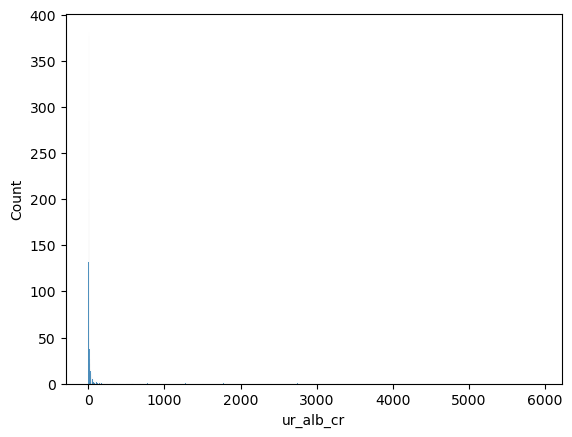

In [12]:
# viewing a histogram to quickly put things in context.
sns.histplot(data=df, x='ur_alb_cr');

<u><mark>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
Yeah, that looks a bit 'off', let's look at this column with values between 0 and 100.  Then look at all values above 100.
</i></font>

age     sex   marital    income         race  waist_circ    bmi  \
17     77  Female    Single 1,600.000  MexAmerican     118.600 30.600   
28     52    Male   Married 3,500.000        White     110.000 31.400   
29     64    Male  Divorced 2,000.000        White      74.600 16.600   
36     69  Female   Widowed   800.000     Hispanic     103.500 32.700   
50     80    Male   Married 2,500.000        White      88.600 21.700   
...   ...     ...       ...       ...          ...         ...    ...   
2291   70  Female   Married 1,700.000        Black     108.000 34.600   
2304   71  Female  Divorced   800.000        White     107.200 29.300   
2306   64    Male   Married       NaN        Asian     105.100 27.500   
2324   65    Male   Married       NaN        Asian      83.100 20.900   
2368   53    Male       NaN 1,000.000        White     117.700 31.300   

      albuminuria  ur_alb_cr  uric_acid  blood_glucose  hdl  triglycerides  \
17              1    187.410      4.200            178   46            107   
28              1    120.730      4.100            258   39            223   
29              1    172.130      6.700             92   56             91   
36              2    821.710      9.300            125   40            286   
50              2  3,267.570      4.700            135   44             75   
...           ...        ...        ...            ...  ...            ...   
2291            1    224.320      6.300            123   67            192   
2304            1    167.740      5.100             88   54             78   
2306            1    152.240      6.600            121   58            151   
2324            1    117.650      5.500             96   55             63   
2368            1    181.820      8.400            129   42            196   

     metabolic_syndrome  
17               MetSyn  
28               MetSyn  
29            No MetSyn  
36               MetSyn  
50            No MetSyn  
...                 ...  
2291             MetSyn  
2304          No MetSyn  
2306             MetSyn  
2324          No MetSyn  
2368             MetSyn  

[110 rows x 14 columns]

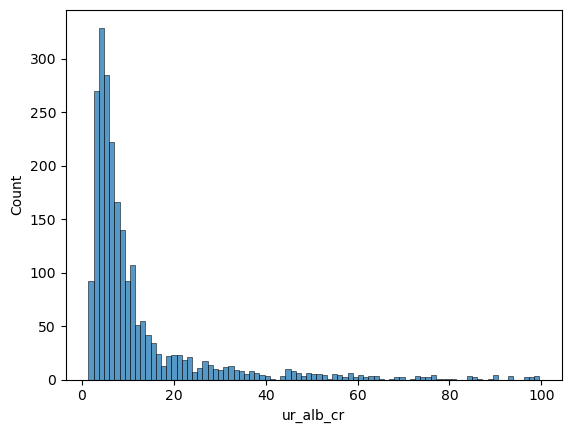

In [13]:
# looking at 'ur_alb_cr' between 0 and 100
sns.histplot(data=df[df['ur_alb_cr'].between(0,100)], x='ur_alb_cr')

# looking at rows with a value greater than 100
df[df['ur_alb_cr'] > 100]

<u><mark>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
Okay, doing some digging reveals that reasonable values for this ratio are between 17 and 300, but high values are not unreasonable.
</i></font>

In [14]:
df[df['ur_alb_cr'] > 1000]

age     sex    marital    income         race  waist_circ    bmi  \
50     80    Male    Married 2,500.000        White      88.600 21.700   
140    80  Female    Married 2,500.000        White      97.500 30.800   
212    74  Female   Divorced   800.000        Asian     111.700 35.300   
246    50    Male  Separated 2,000.000        Black      75.500 19.600   
312    39  Female     Single 9,000.000        Black     118.000 37.500   
324    48    Male    Married 1,500.000  MexAmerican     123.000 38.500   
418    69    Male    Married 2,500.000        Asian      93.200 27.200   
872    63  Female  Separated 1,600.000  MexAmerican     111.500 35.200   
891    80  Female  Separated 2,500.000        Black     103.100 30.400   
910    58    Male    Married 2,000.000  MexAmerican     100.600 25.600   
1086   63    Male    Married 4,500.000        Black     124.500 35.000   
1438   70  Female    Married       NaN        Black     115.400    NaN   
1557   80  Female    Widowed 1,600.000        Black         NaN 42.200   
2023   80  Female    Widowed 1,600.000        Black      93.300 25.800   
2027   55    Male    Married 9,000.000        Black     134.900 42.500   
2070   77    Male    Married 2,500.000        Black      92.000 23.300   
2137   25    Male     Single 8,200.000        Black     114.500 33.600   
2196   52    Male   Divorced 1,000.000        White     114.200 33.400   

      albuminuria  ur_alb_cr  uric_acid  blood_glucose  hdl  triglycerides  \
50              2  3,267.570      4.700            135   44             75   
140             2  3,284.620      7.800            132   65            130   
212             2  1,777.050      7.200            104   37            111   
246             2  2,750.000      5.700            127   80             92   
312             2  2,238.100      7.100            291   34            248   
324             2  2,403.850      6.600            100   53            166   
418             2  1,817.310      6.700             99   64             93   
872             2  1,276.600      8.100             47   60            159   
891             2  1,511.110      6.200            250   47             80   
910             2  3,666.670      8.800            211   48            188   
1086            2  1,024.310      5.100            180   46             85   
1438            2  2,360.660      9.200             98   59            209   
1557            2  5,928.000      8.100            120   60            169   
2023            2  2,047.170      8.400            126   63             95   
2027            2  2,403.850      8.100            159   35            105   
2070            2  4,462.810      7.400            110   79             91   
2137            2  1,016.670      4.900            102   48            114   
2196            2  3,500.000      8.100            128   29            814   

     metabolic_syndrome  
50            No MetSyn  
140              MetSyn  
212              MetSyn  
246           No MetSyn  
312              MetSyn  
324              MetSyn  
418           No MetSyn  
872              MetSyn  
891              MetSyn  
910           No MetSyn  
1086             MetSyn  
1438             MetSyn  
1557             MetSyn  
2023             MetSyn  
2027             MetSyn  
2070          No MetSyn  
2137             MetSyn  
2196             MetSyn

<u><mark>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
There are enough high values here that while I find them suspicious, I don't have the necessary expertise to make a judgement call on what the upper limits may be.  I don't see a clear pattern that points to a mistake, so we'll just leave these outliers in the dataset.
</i></font>

##### Checking 'triglycerides'

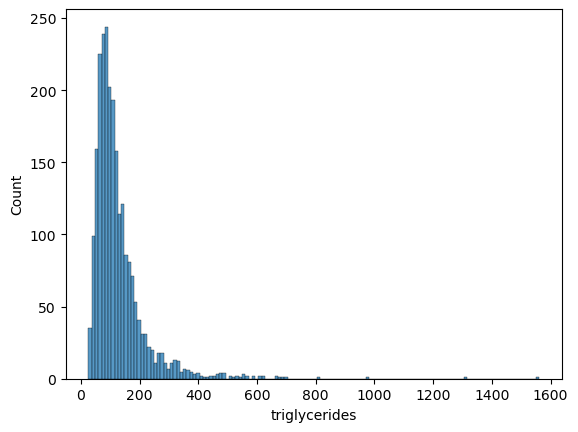

In [15]:
# taking a look at the value distribution
sns.histplot(data=df, x='triglycerides');

<u>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
Normal triglyceride levels (mg/Dl) are between 75-200, with high levels 200-500, and very high 500 and above.  This may be another case where what looks like errors are just extreme cases of very sick patients.
</i></font>

In [16]:
# Checking values above 800
df[df['triglycerides'] > 800]

age     sex   marital    income         race  waist_circ    bmi  \
829    50    Male    Single 1,600.000  MexAmerican      92.900 27.600   
1016   58    Male   Married 9,000.000        White      97.600 28.500   
2092   45  Female       NaN 2,000.000        White     102.200 28.100   
2196   52    Male  Divorced 1,000.000        White     114.200 33.400   

      albuminuria  ur_alb_cr  uric_acid  blood_glucose  hdl  triglycerides  \
829             2    844.830      4.200            335   35            979   
1016            0      7.650      4.900            126   28           1311   
2092            0     23.280      6.500             75   27           1562   
2196            2  3,500.000      8.100            128   29            814   

     metabolic_syndrome  
829              MetSyn  
1016             MetSyn  
2092             MetSyn  
2196             MetSyn

<u>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
The highest level of triglycerides I can find is 4,155 mg/Dl from this [case](https://www.guinnessworldrecords.com/world-records/highest-triglyceride-level#:~:text=Christopher%20Bogdewic%20(USA)%20was%20measured,Family%20Medicine%2C%20Virginia%2C%20USA.).  I'm going to assume these values are outliers, but do not represent errors, so they will stay in the dataset
</i></font>

#### **Inspect Numeric Values with Visualizations**

In [17]:
sns.pairplot(df);

<u>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
This is definitely overkill, but I prefer it because it gives us a quick way to look at a lot of data in one line of code and see if anything jumps out, we'll explore another version of this plot later on, for now: <br><br>

<font color='dodgerblue' size=4>
    
* There are a few big gaps in income, there may be missing values there or it might be related to the demographic that the patients represent
* It might be worth taking a closer look at 'bmi' and 'waist_circ'.  There seem to be some high values there that probably belong there, but there is definitely a skew.  The correlation between these two features is visibly evident in the scatter plots.
* Albuminuria is relatively rare in the dataset, assuming a 0 means no albuminuria.
* We can see many of these distributions are heavily skewed, will need to keep this in mind if we need to impute values.
</i></font>

##### Checking 'income'

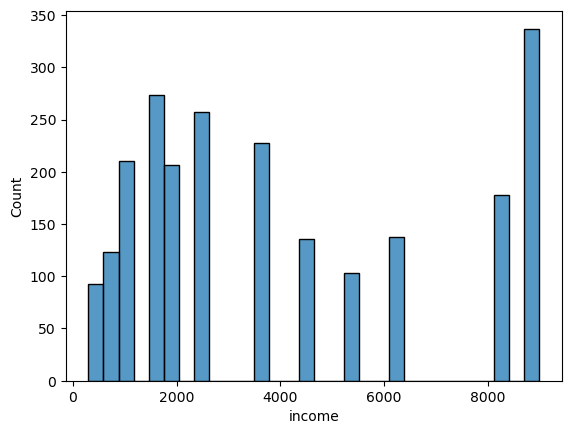

In [18]:
# looking at the income column
sns.histplot(data=df, x='income', bins=30);

<u>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
It looks to me like everyone's income was binned in whatever form/questionnaire was filled out for these data.  Let's see if we can get an even clearer idea of what the bins were.  There seems to be a few holes in this distribution.
</i></font>

In [19]:
# displaying the unique income values
# sorted and if np.isnan are used because the nan was somehow throwing off the sorting function
display(sorted([i for i in df['income'].unique() if np.isnan(i) == False]))

[300.0,
 800.0,
 1000.0,
 1500.0,
 1600.0,
 1700.0,
 2000.0,
 2500.0,
 3500.0,
 4500.0,
 5400.0,
 6200.0,
 8200.0,
 9000.0]

<mark><u>**Comment:**

<font color='dodgerblue' size=4><i>

* <font color='dodgerblue' size=4><i> 
It looks to me like we have a hole in our data between 6200 and 8200.  We'll look at more missing values in the next section.
* <font color='dodgerblue' size=4><i> It appears like there are a suprising amount of high earners in this dataset, but I think that because the data were binned, there was likely a box of "$9,000 month or above" or something similar.  If the survery was more specific, I would guess we'd see a more gradual tail representing high earners, instead of a spike at 9,000.

##### Checking 'waist_circ' and 'bmi'

In [20]:
# building histograms to get a better sense of the distributions
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(3,3), dpi=200)
sns.histplot(data=df, x='waist_circ', bins=100, ax=ax1)
sns.histplot(data=df, x='bmi', bins=100, ax=ax2);

<u><mark>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
If not for the high value outliers these would be resemble normal distributions.  I think that these outliers make sense for this dataset (i.e. obese patients are at higher risk of metabolic syndrome), but we'll take look in case there are outliers that represent errors.
</i></font>

In [21]:
display(df[df['bmi'] > 55], df[df['waist_circ'] > 150])

age     sex   marital    income   race  waist_circ    bmi  albuminuria  \
77     71  Female   Widowed 1,000.000  White     140.600 56.300            1   
169    40  Female   Married 9,000.000  Black     163.500 68.700            0   
507    51  Female    Single 9,000.000  Black     144.400 59.000            0   
702    51  Female    Single 2,500.000  Black     155.900 55.800            0   
717    42    Male       NaN 6,200.000  Black     147.500 56.600            1   
1153   54  Female   Married 1,700.000  White     142.800 59.200            0   
1428   31  Female  Divorced 1,000.000  White     170.500 56.800            1   
1490   46  Female   Married 6,200.000  Black         NaN 62.800            0   
1819   58    Male       NaN 2,500.000  Black     176.000 55.700            0   
2132   41  Female   Married   300.000  Black     155.000 57.100            0   
2396   48  Female   Married 1,000.000  Other         NaN 59.700            0   

      ur_alb_cr  uric_acid  blood_glucose  hdl  triglycerides  \
77       30.210     11.200            134   53            167   
169      20.690      5.600            107   49             61   
507      13.490      6.400            109   71             55   
702       4.970      4.400            126   79             59   
717      31.450      6.400            136   35            102   
1153      9.650      6.400            103   43            139   
1428    180.560      7.700             94   33            176   
1490      2.900      8.100            103   60            101   
1819      2.270      6.600            106   85             64   
2132      6.640      5.500            147   47             78   
2396     22.110      5.800            152   57            107   

     metabolic_syndrome  
77               MetSyn  
169              MetSyn  
507              MetSyn  
702              MetSyn  
717              MetSyn  
1153             MetSyn  
1428             MetSyn  
1490          No MetSyn  
1819             MetSyn  
2132             MetSyn  
2396          No MetSyn

age     sex    marital    income         race  waist_circ    bmi  \
118    29    Male     Single 2,000.000        Asian     154.700 48.300   
169    40  Female    Married 9,000.000        Black     163.500 68.700   
702    51  Female     Single 2,500.000        Black     155.900 55.800   
1159   60    Male    Married 5,400.000        White     152.400 54.100   
1292   65    Male   Divorced 1,600.000  MexAmerican     150.700 47.000   
1428   31  Female   Divorced 1,000.000        White     170.500 56.800   
1684   55    Male  Separated 1,000.000     Hispanic     151.000 48.400   
1819   58    Male        NaN 2,500.000        Black     176.000 55.700   
1836   58    Male    Married 2,000.000        White     151.800 51.500   
2132   41  Female    Married   300.000        Black     155.000 57.100   

      albuminuria  ur_alb_cr  uric_acid  blood_glucose  hdl  triglycerides  \
118             0      4.730      7.200            122   30            199   
169             0     20.690      5.600            107   49             61   
702             0      4.970      4.400            126   79             59   
1159            0      9.470      6.700            231   40            155   
1292            1     40.150      4.600            103   50            106   
1428            1    180.560      7.700             94   33            176   
1684            2    352.940      6.400            132   21            215   
1819            0      2.270      6.600            106   85             64   
1836            1     55.130      5.800            128   29            145   
2132            0      6.640      5.500            147   47             78   

     metabolic_syndrome  
118              MetSyn  
169              MetSyn  
702              MetSyn  
1159             MetSyn  
1292             MetSyn  
1428             MetSyn  
1684             MetSyn  
1819             MetSyn  
1836             MetSyn  
2132             MetSyn

<u><mark>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
All of these values appear to be in the realm of possibilities.  Based on the skew of these columns, I would impute with median for missing values.
</i></font>

#### **Categorical Columns**

In [22]:
# Display the descriptive statistics for the non-numeric columns
df.describe(include='object')

sex  marital   race metabolic_syndrome
count     2401     2193   2401               2401
unique       2        5      6                  2
top     Female  Married  White          No MetSyn
freq      1211     1192    933               1579

<mark><u>**Comment:**

* <font color='dodgerblue' size=4><i> 
Our values for 'sex' are very close to even
* <font color='dodgerblue' size=4><i> 
    We are missing values for 'marital'
* <font color='dodgerblue' size=4><i> 
    We have an unbalanced target
<font color='dodgerblue' size=4>


In [23]:
# Inspect unique values in the object columns and for numeric columns that may actually be categorical 
for col in df.columns:
  if df[col].dtype == 'object' or len(df[col].unique()) <= 15:
    print(col.upper(), df[col].unique(), '\n------------>', str(df[col].dtype).upper(), '\n*******')

SEX ['Male' 'Female'] 
------------> OBJECT 
*******
MARITAL ['Single' 'Married' 'Widowed' 'Divorced' nan 'Separated'] 
------------> OBJECT 
*******
INCOME [8200. 4500.  800. 2000.   nan  300. 9000. 6200. 1000. 2500. 3500. 1500.
 1600. 5400. 1700.] 
------------> FLOAT64 
*******
RACE ['White' 'Asian' 'Black' 'MexAmerican' 'Hispanic' 'Other'] 
------------> OBJECT 
*******
ALBUMINURIA [0 1 2] 
------------> INT64 
*******
METABOLIC_SYNDROME ['No MetSyn' 'MetSyn'] 
------------> OBJECT 
*******


<u><mark>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
No unusual values noted.
* <font color='dodgerblue' size=4> <i>
    'albuminuria' is ordinal encoded
* <font color='dodgerblue' size=4> <i>
    The other 3 categorical features will need to be one hot encoded ('sex', 'marital', 'race')
</i></font>

#### Inspect Categoric Values with Visualizations

<AxesSubplot: xlabel='race', ylabel='count'>

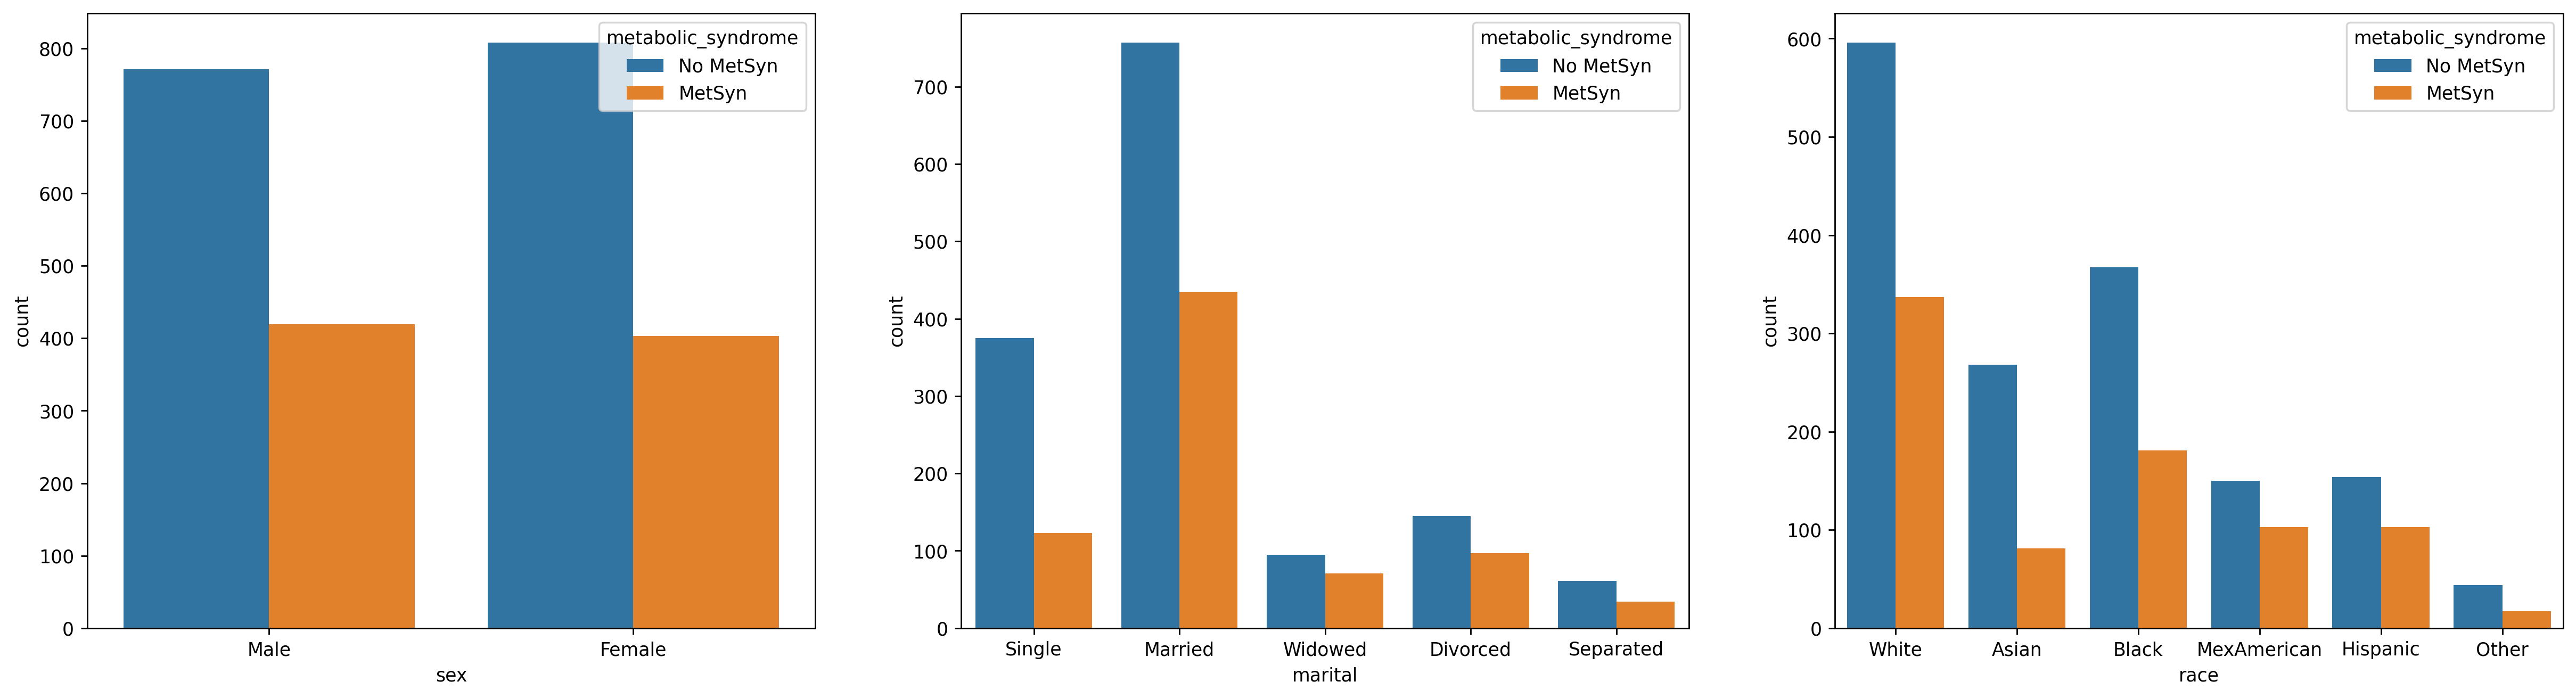

In [24]:
# plotting all categorical variables in histograms 
# grouped by 'metabolic_syndrome' to get a sense of distributions

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6), dpi=250)

sns.countplot(data=df, x='sex', hue='metabolic_syndrome', ax=ax1)
sns.countplot(data=df, x='marital', hue='metabolic_syndrome', ax=ax2)
sns.countplot(data=df, x='race', hue='metabolic_syndrome', ax=ax3);

<u><mark>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
All 3 of these categories look like they may turn out to just be noise 
* <font color='dodgerblue' size=4> <i>'sex' looks like it may not have a large effect on disease outcomes, those ratios look very similar.
* <font color='dodgerblue' size=4> <i>'marital' may have some effect, there seems to be higher ratio of metsyn among divorced and widowed, but that may just be a hidden variable exerting itself ('age')
* <font color='dodgerblue' size=4> <i>'race' looks to have some effect (looks like there is a higher incidence in MexAmerican and Hispanic), but would consider removing it to see how it effects the model.
</i></font>

## **3. Further Explore the Data Through Visualizations**

### Heatmap

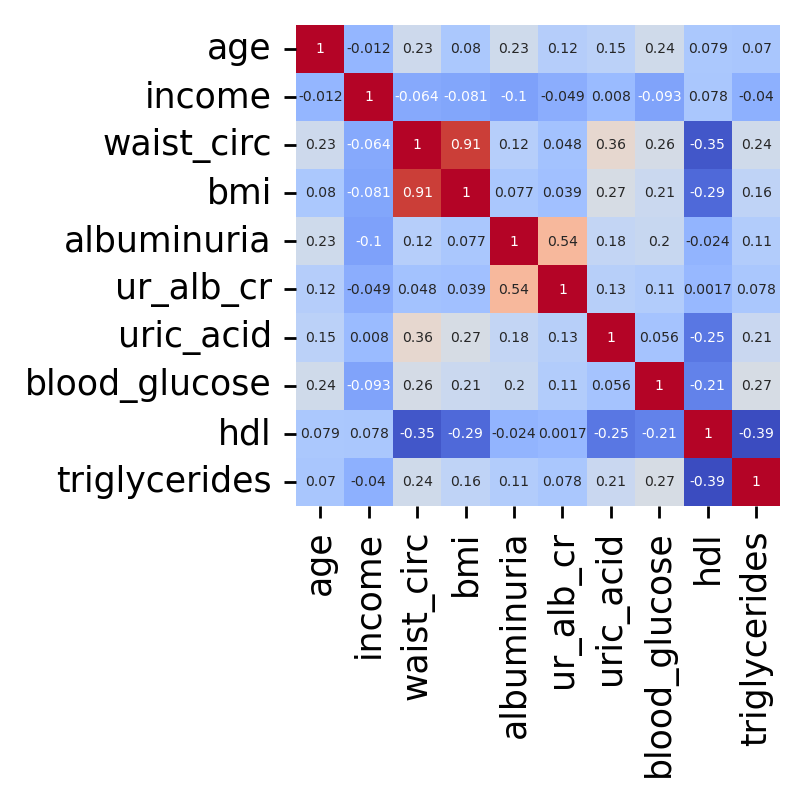

In [25]:
# viewing a heatmap to see correlation between features
plt.figure(figsize=(2.5,2.5), dpi=250)
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, 
                      cbar=False, annot_kws={'fontsize':4});

<mark><u>**Comment:**

<font color='dodgerblue' size=4><i>

* <font color='dodgerblue' size=4><i> 
bmi and waist_circ are linked of course
* <font color='dodgerblue' size=4><i> 
It also makes sense that albuminuria is correlated with ur_alb_cr
* <font color='dodgerblue' size=4><i> 
There's also a weak correlation of waist_circ and uric_acid which may make sense later.
* <font color='dodgerblue' size=4><i> 
In this case, the heat map is not contributing much that we haven't already discovered
</i></font>

### Pairplot with added Target Dimension

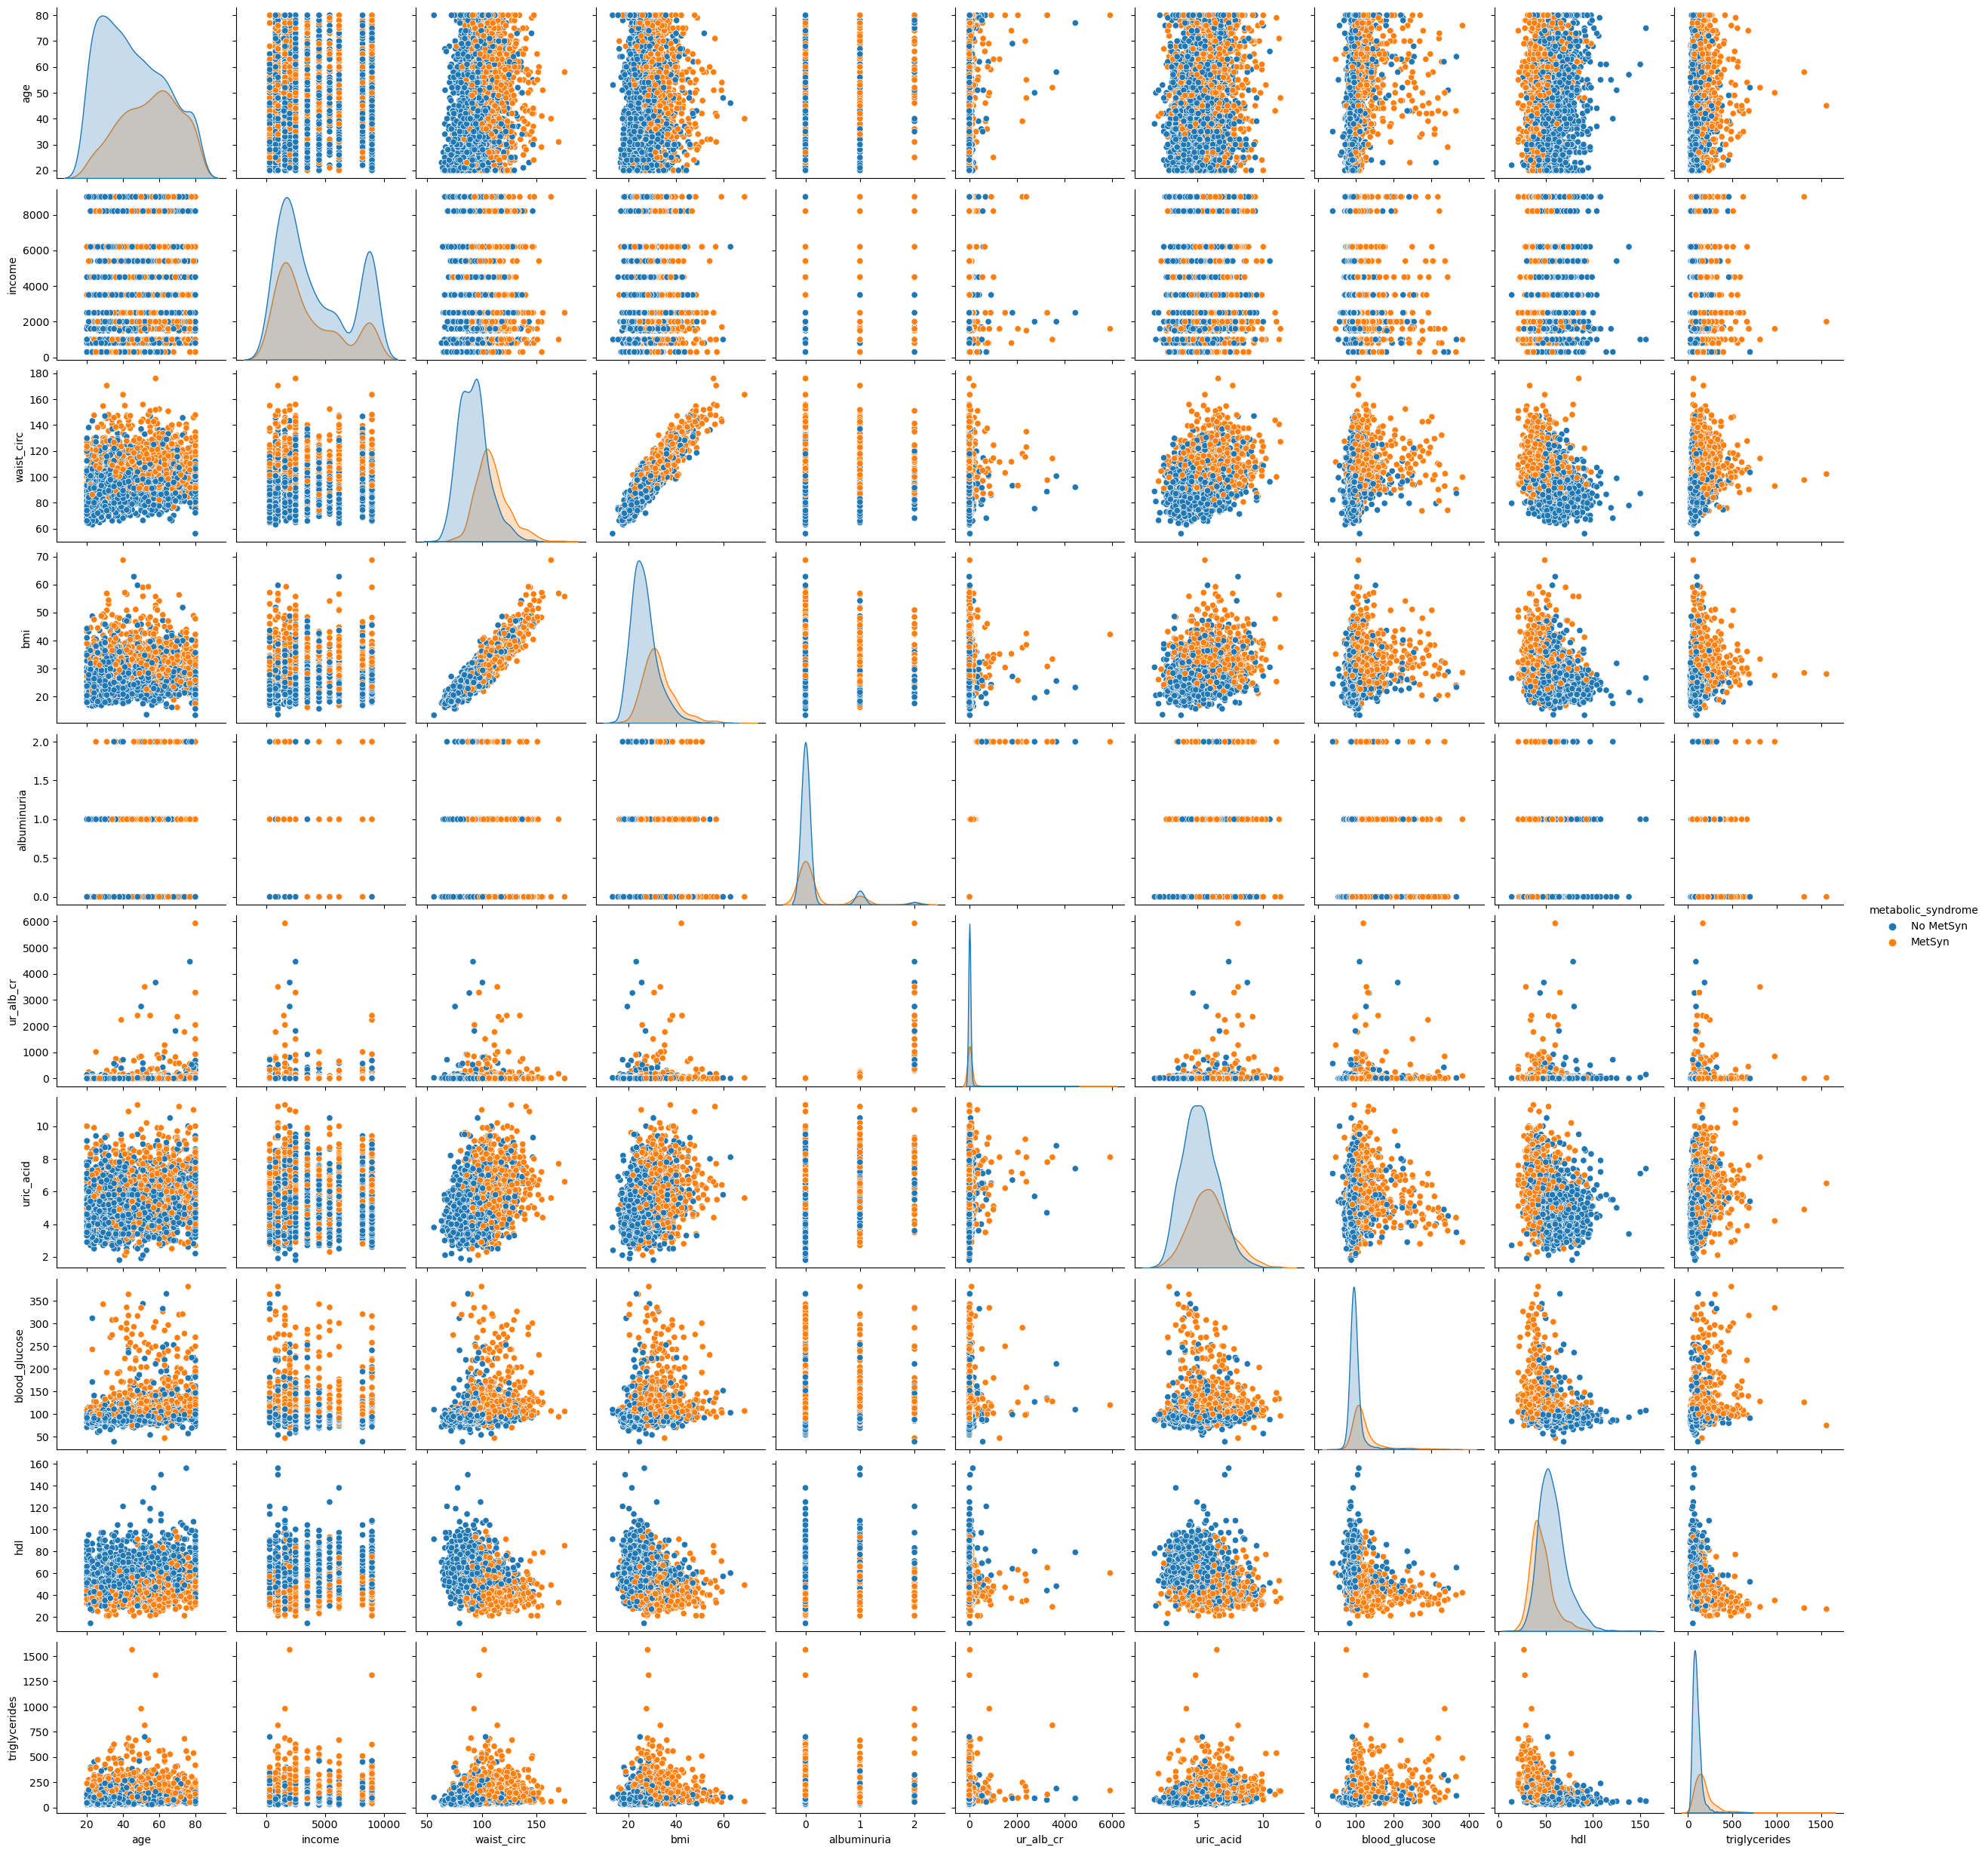

In [26]:
sns.pairplot(data=df, hue='metabolic_syndrome');

<u><mark>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
There is a lot here.  **Blue = No Metabolic Syndrome (metsyn); Orange = Metabolic Syndrome**. We have scatterplots showing relationships between all of our numeric variables, and we can also see the distribution of the target.  I find the kde plots running along the diagonal to be particularly insightful <br><br>
    
<font color='dodgerblue' size=4>
        
* 'Age': There are more older patients with metsyn than younger patients
* 'Income': We can see that our missing data has created a gap in the distribution so the data appears bi-modal, however, I don't believe that is actually the case.  It looks like income is evenly distributed between those with the syndrome and those without, this may be a good candidate for a feature to drop.
* 'Waist Circ': This appears to be a factor is risk of developing metsyn and appears to be linked to other features in the dataset by glancing at the scatterplots.
* 'BMI': Ditto for this feature, we might consider dropping one or the other of bmi and waist_circ and see how the model responds, since these features are intertwined.
* 'Ur_Alb_Cr':  It's interesting to note that very very high values in this category do not necessarily indicate metsyn, there are interactions here that I don't understand.
* 'Uric Acid', 'Blood Glucose', 'Triglycerides':  These columns appear to have similar interactions with metasyn.  They have an effect on outcomes, not huge, but present.
* 'HDL':  This is 'good' cholesterol, and we can see that for this feature, higher numbers are correlated with better outcomes in terms of the risk of metsyn.
</i></font>

## **Simple Explanatory Visualizations**

### What Conditions Define Metabolic Syndrome?

The Five Markers of Metabolic Syndrome
* Large waist — A waistline that measures at least 35 inches (89 centimeters) for women and 40 inches (102 centimeters) for men
* High triglyceride level — 150 milligrams per deciliter (mg/dL), or 1.7 millimoles per liter (mmol/L), or higher of this type of fat found in blood
* Reduced "good" or HDL cholesterol — Less than 40 mg/dL (1.04 mmol/L) in men or less than 50 mg/dL (1.3 mmol/L) in women of high-density lipoprotein (HDL) cholesterol
* <font color='darkorange'>Increased blood pressure — 130/85 millimeters of mercury (mm Hg) or higher ***Not present in this dataset***
* Elevated fasting blood sugar — 100 mg/dL (5.6 mmol/L) or higher

In [27]:
# setting up the fig and ax and other plot parameters
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize=(10,8), dpi=300)
fig.suptitle('4 of the 5 Conditions that Define Metabolic Syndrome',
            fontsize=24, fontfamily='Times New Roman')
fig.subplots_adjust(hspace=.4)

sns.set_style('whitegrid')
# Risk Factor 1: Waist Circumference
sns.barplot(data=df, y='waist_circ', x='metabolic_syndrome', errorbar=None, ax=ax0)
ax0.set_ylabel('Waist Circumference')
ax0.set_xlabel('Metabolic Syndrome?')
ax0.set_xticklabels(['No', 'Yes'])
ax0.set_title('Avg Waist Circumference', pad=15,
             fontdict={'fontsize':14, 'fontfamily':'Times New Roman'})

# Risk Factor 2: High Triglyceride Level
sns.barplot(data=df, y='triglycerides', x='metabolic_syndrome', errorbar=None, ax=ax1)
ax1.set_ylabel('Triglycerides mg/dL')
ax1.set_xlabel('Metabolic Syndrome?')
ax1.set_xticklabels(['No', 'Yes'])
ax1.set_title('Avg Triglycerides', pad=15, 
              fontdict={'fontsize':14, 'fontfamily':'Times New Roman'})

# Risk Factor 3: Reduced HDL Cholesterol Level
sns.barplot(data=df, y='hdl', x='metabolic_syndrome', errorbar=None, ax=ax2)
ax2.set_ylabel('HDL mg/dL')
ax2.set_xlabel('Metabolic Syndrome?')
ax2.set_xticklabels(['No', 'Yes'])
ax2.set_title('Avg HDL Cholesterol, *Higher Values are Good*', pad=15, 
              fontdict={'fontsize':14, 'fontfamily':'Times New Roman'})

# Risk Factor 4: Elevated Blood Glucose Levels
sns.barplot(data=df, y='blood_glucose', x='metabolic_syndrome', errorbar=None, ax=ax3)
ax3.set_ylabel('glucose mg/dL')
ax3.set_xlabel('Metabolic Syndrome?')
ax3.set_xticklabels(['No', 'Yes'])
ax3.set_title('Avg Blood Glucose Level', pad=15,
             fontdict={'fontsize':14, 'fontfamily':'Times New Roman'});

# Risk Factor 5: Increased Blood Pressure (Not available in this dataset)

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
This visualization is displaying the average values for the 4 out of 5 symptoms that are used to make a diagnosis of Metabolic Syndrome (the 5th, blood pressure, is not present in the data).  The intent is to convey fundamental information on how the syndrome is defined and also how the dataset provides a solid basis for predicting Metabolic Syndrome.
</i></font>

In [28]:
# displaying the 4 conditions present in the data
df.groupby('metabolic_syndrome')[['waist_circ', 'blood_glucose', 
                                  'hdl', 'triglycerides']].mean()

waist_circ  blood_glucose    hdl  triglycerides
metabolic_syndrome                                                 
MetSyn                 109.372        125.725 45.555        184.558
No MetSyn               92.401         99.149 57.438         98.747

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
These are all mean values for the values presented in the above bar charts for a more specific look in to the numbers.
</i></font>

### Does the Risk of Metabolic Syndrome Increase with Age?

In [29]:
# filtering for two groups, those with the syndrome and without
met_syn = df[df['metabolic_syndrome']=='MetSyn']
no_met_syn = df[df['metabolic_syndrome']=='No MetSyn']

# grouping by age
met_syn_ages = met_syn.groupby('age')['metabolic_syndrome'].count().reset_index(name='has_metsyn')
no_met_syn_ages = no_met_syn.groupby('age')['metabolic_syndrome'].count().reset_index(name='no_metsyn')

# rejoining
all_ages = met_syn_ages.merge(no_met_syn_ages, on='age', how='outer')

# calculating the percentage with the syndrome for each age group
all_ages['proportion'] = all_ages['has_metsyn'] / (all_ages['has_metsyn'] + all_ages['no_metsyn']) * 100

age  has_metsyn  no_metsyn  proportion
0    20           7         39      15.217
1    21           4         44       8.333
2    22           5         48       9.434
3    23           6         35      14.634
4    24           8         37      17.778
..  ...         ...        ...         ...
56   76          12          8      60.000
57   77          10         11      47.619
58   78          13         13      50.000
59   79           5         13      27.778
60   80          53         71      42.742

[61 rows x 4 columns]

In [30]:
# plotting age and percentage with Metabolic Syndrome
plt.figure(figsize=(14, 8), dpi=300)
sns.lineplot(data=all_ages, x='age', y='proportion', linewidth=5, c='crimson')
plt.title('Risk of Metabolic Syndrome Rises with Age', pad=18, 
          fontdict={'fontsize':38, 'fontfamily':'Times New Roman'})
plt.xlabel('Age Group', labelpad= 14, 
           fontdict={'fontsize':26, 'fontfamily':'Times New Roman'})
plt.ylabel('Percentage with Syndrome', labelpad= 14, 
           fontdict={'fontsize':26, 'fontfamily':'Times New Roman'})
plt.yticks(range(10, 71, 5), fontsize=14)
plt.xticks(range(20, 86, 5), fontsize=14);

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
**This line chart shows the percentage of patients with Metabolic Syndrome in each age group.**
    
<font color='dodgerblue' size=4><i>
It is clear that the risk of Metabolic Syndrome increases with age, which is expected as our bodies become less resilient as we get older.  
    
<font color='dodgerblue' size=4><i>
There is an interesting trend for patients in their mid 70's and beyond, where risk actually decreases!  It is hard to make a clear attribution on this since the provenance of the data is murky.  However, my guess is that this older cohort represents a "survivorship bias", i.e. most patients with Metabolic Syndrome wouldn't make it to this age and are not represented in the data.  My hunch is that these patients were included in this dataset because their advanced age leads to conditions that place them at risk for a Metabolic Syndrome diagnosis.
</i></font>

## **4. Final Cleaning, Preparation Before Preprocessing**

### Missing Values

In [31]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 436 missing values.


In [32]:
# Display the count of missing values by column
print(df.isna().sum())

age                     0
sex                     0
marital               208
income                117
race                    0
waist_circ             85
bmi                    26
albuminuria             0
ur_alb_cr               0
uric_acid               0
blood_glucose           0
hdl                     0
triglycerides           0
metabolic_syndrome      0
dtype: int64


In [33]:
# Display the percentage of missing values by column
print(df.isna().sum()/len(df)*100)

age                  0.000
sex                  0.000
marital              8.663
income               4.873
race                 0.000
waist_circ           3.540
bmi                  1.083
albuminuria          0.000
ur_alb_cr            0.000
uric_acid            0.000
blood_glucose        0.000
hdl                  0.000
triglycerides        0.000
metabolic_syndrome   0.000
dtype: float64


In [34]:
# inspecting median and mean values for each column with missing we may impute
print(f"Income - Mean: {df['income'].mean()}, Median: {df['income'].median()}")
print(f"Waist_Circ - Mean: {df['waist_circ'].mean()}, Median: {df['waist_circ'].median()}")
print(f"BMI - Mean: {df['bmi'].mean()}, Median: {df['bmi'].median()}")

Income - Mean: 4005.2539404553413, Median: 2500.0
Waist_Circ - Mean: 98.30725388601036, Median: 97.0
BMI - Mean: 28.702189473684214, Median: 27.7


<u><mark>Comment:</u> <br>
<font color='dodgerblue' size=4> <i>
This confirms what we were seeing in the distributions: We have skewed distributions, with higher values pushing the mean values up, by a small margin in the case of bmi and waist_circ and by a large margin in the case of income.
</i></font>

#### Replace NaNs with 'missing' for 'marital'

In [35]:
df['marital'] = df['marital'].fillna('missing')
df.isna().sum()

age                     0
sex                     0
marital                 0
income                117
race                    0
waist_circ             85
bmi                    26
albuminuria             0
ur_alb_cr               0
uric_acid               0
blood_glucose           0
hdl                     0
triglycerides           0
metabolic_syndrome      0
dtype: int64

#### **Missing Values Strategies and To-Do**

<mark><u>**Comment:**</u>

* <font color='dodgerblue' size=4><i>
'marital':  We replaced the NaNs with 'missing'.  I suspect we may end up dropping this feature anyways
* <font color='dodgerblue' size=4><i>'income':  Impute with **median** during preprocessing.  This is due to a overall skewed distribution.  This is another column we are likely to drop from the features.
* <font color='dodgerblue' size=4><i>'waist_circ': Impute with **median** during preprocessing, due to skew of distribution.
* <font color='dodgerblue' size=4><i>'bmi': Impute with **median** during preprocessing, due to skew of distribution
</i></font>

## **5. Preprocessing**

### Changing target and 'sex' to numerical

In [36]:
# checking values
df['metabolic_syndrome'].value_counts()

No MetSyn    1579
MetSyn        822
Name: metabolic_syndrome, dtype: int64

In [37]:
# changing target to numerical
df['metabolic_syndrome'] = df['metabolic_syndrome'].replace({'No MetSyn':0, 'MetSyn':1})

# confirming changes and correct values
df['metabolic_syndrome'].value_counts()

0    1579
1     822
Name: metabolic_syndrome, dtype: int64

In [38]:
# checking values
df['sex'].value_counts()

Female    1211
Male      1190
Name: sex, dtype: int64

In [39]:
# changing target to numerical
df['sex'] = df['sex'].replace({'Female':0, 'Male':1})

# confirming changes and correct values
df['sex'].value_counts()

0    1211
1    1190
Name: sex, dtype: int64

### Feature Engineering

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Through looking at the data and outside research, I've learned that being of hispanic ethnicity puts patients at higher risk of metabolic syndrome.  Therefore, I'm creating a separate column that condenses 'race' down to hispanic or non-hispanic. Doing so provides the models with a slight boost in recall. 
</i></font>

In [40]:
# getting column counts to check my work later
df['race'].value_counts()

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: race, dtype: int64

In [41]:
# creating the new column
df['hispanic_ethnicity'] = df['race'].apply(lambda x: 1 if x in ['MexAmerican', 'Hispanic'] else 0)
# confirming values
df['hispanic_ethnicity'].value_counts()

0    1891
1     510
Name: hispanic_ethnicity, dtype: int64

### Splitting target and features, Train and Test

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
I'm making the call here to drop 'income' and 'marital' status for two reasons:  1. I suspect them to be noise and unnecessary, and 2. from a more pragmatic standpoint, I think they are patient attributes that are more likely to be left out of medical data, or simply incomplete or inaccurate.  This could effect the viability of deploying the model.  I'm also dropping 'race' as the new column 'hispanic_ethnicity' now covers that dimension of the data.
<font color='dodgerblue' size=4><i>    
    <br>
Also, I'm making the decision to stratify the validation data since we have an unbalanced target
</i></font>

In [42]:
# splitting X and y
X = df.drop(columns=['income', 'marital', 'metabolic_syndrome', 'race']).copy()
y = df['metabolic_syndrome'].copy()

In [43]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# verifying the split
print(df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2401, 15) (1800, 11) (601, 11) (1800,) (601,)


### Constructing the preprocessor

In [44]:
# taking another look at dtypes
X.dtypes

age                     int64
sex                     int64
waist_circ            float64
bmi                   float64
albuminuria             int64
ur_alb_cr             float64
uric_acid             float64
blood_glucose           int64
hdl                     int64
triglycerides           int64
hispanic_ethnicity      int64
dtype: object

In [45]:
# instantiating transformers and creating the pipeline
scaler = StandardScaler()
imputer = SimpleImputer(strategy='median')

preprocessor = make_pipeline(imputer, scaler)

In [46]:
# confirming preprocessor
X_train_df = pd.DataFrame(preprocessor.fit_transform(X_train))
display(X_train_df.describe(), X_train_df.isna().sum().sum())

0         1         2         3         4         5         6   \
count 1,800.000 1,800.000 1,800.000 1,800.000 1,800.000 1,800.000 1,800.000   
mean      0.000     0.000    -0.000     0.000     0.000    -0.000     0.000   
std       1.000     1.000     1.000     1.000     1.000     1.000     1.000   
min      -1.631    -0.982    -2.609    -2.304    -0.366    -0.174    -2.528   
25%      -0.826    -0.982    -0.699    -0.696    -0.366    -0.161    -0.699   
50%      -0.079    -0.982    -0.086    -0.155    -0.366    -0.150    -0.066   
75%       0.783     1.018     0.574     0.536    -0.366    -0.121     0.637   
max       1.818     1.018     4.781     6.006     4.390    18.787     4.084   

             7         8         9         10  
count 1,800.000 1,800.000 1,800.000 1,800.000  
mean      0.000    -0.000     0.000    -0.000  
std       1.000     1.000     1.000     1.000  
min      -2.027    -2.635    -1.032    -0.519  
25%      -0.461    -0.682    -0.544    -0.519  
50%      -0.254    -0.144    -0.251    -0.519  
75%       0.071     0.529     0.212    -0.519  
max       8.108     5.713    14.340     1.927

0

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Everything looks good here, our numerical values have been scaled (means are all zeroed), and we no longer have categorical columns due to dropped columns and feature engineering.  No NaNs
</i></font>

## **6. Modeling**

### A note about overall approach

<mark><u>**Comment:**</u>
    
<font color='dodgerblue' size=4><i>
**While building models I'm going to attempt to maximize the recall score.**  <br><br>
This notebook serves as an exercise and there are no top down directives for the model's application, so I'm envisioning this model's use case as an in-house tool that may scan patient data for warning flags to bring to the care team's attention. It could be part of a suite of tools that process patient data during the triage/form-filling stages of a clinic visit (in which case it should be fast), or as a behind the scenes, between visits monitoring tool (in which case it may afford to be slower).  <br><br>
    **Therefore, the thinking here is to catch as many possible potential cases of metabolic syndrome, knowing that the false positives will be weeded out by the care team.  However, I think it's also a good idea to tread lightly here, as an accuracy score that is too low will result in a model that eventually won't be trusted.**
</i></font>

### Random Forest (baseline)

In [47]:
# constructing the model pipeline
ranfor_pipe = make_pipeline(preprocessor, 
                            RandomForestClassifier(random_state=42))
# running and adding to dataframe
# add_metrics(ranfor_pipe, X_train, X_test, y_train, y_test, model_name='Base Random Forest')
ranfor_pipe.fit(X_train, y_train);

In [48]:
# viewing results
print(classification_report(y_train, ranfor_pipe.predict(X_train)))
print(classification_report(y_test, ranfor_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       1.00      1.00      1.00       616

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       395
           1       0.85      0.82      0.84       206

    accuracy                           0.89       601
   macro avg       0.88      0.87      0.88       601
weighted avg       0.89      0.89      0.89       601



<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Not bad, but I was really hoping for some higher numbers, let's see if we can bring that recall score up by tuning the model
</i></font>

### Random Forest (tuned)

In [49]:
# hyperparameter tuning
ranfor_params = {'randomforestclassifier__n_estimators': [120],
                'randomforestclassifier__max_depth': [15],
                'randomforestclassifier__min_samples_leaf': [1],
                'randomforestclassifier__min_samples_split': [5]}

In [50]:
# creating GridSearch and a new Random Forest model, fitting
ranfor_pipe2 = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
grid_ranfor = GridSearchCV(ranfor_pipe2, ranfor_params, scoring='recall')
grid_ranfor.fit(X_train, y_train);

In [51]:
# putting GridSearch results into a dataframe for viewing and sorting
gr_ranfor_df = pd.DataFrame(grid_ranfor.cv_results_)
gr_ranfor_df.sort_values('rank_test_score').T

0  \
mean_fit_time                                                                                0.269   
std_fit_time                                                                                 0.031   
mean_score_time                                                                              0.019   
std_score_time                                                                               0.002   
param_randomforestclassifier__max_depth                                                         15   
param_randomforestclassifier__min_samples_leaf                                                   1   
param_randomforestclassifier__min_samples_split                                                  5   
param_randomforestclassifier__n_estimators                                                     120   
params                                           {'randomforestclassifier__max_depth': 15, 'ran...   
split0_test_score                                                                            0.813   
split1_test_score                                                                            0.780   
split2_test_score                                                                            0.821   
split3_test_score                                                                            0.772   
split4_test_score                                                                            0.847   
mean_test_score                                                                              0.807   
std_test_score                                                                               0.027   
rank_test_score                                                                                  1   

                                                                                                 2  \
mean_fit_time                                                                                0.251   
std_fit_time                                                                                 0.004   
mean_score_time                                                                              0.018   
std_score_time                                                                               0.002   
param_randomforestclassifier__max_depth                                                         15   
param_randomforestclassifier__min_samples_leaf                                                   1   
param_randomforestclassifier__min_samples_split                                                  5   
param_randomforestclassifier__n_estimators                                                     122   
params                                           {'randomforestclassifier__max_depth': 15, 'ran...   
split0_test_score                                                                            0.805   
split1_test_score                                                                            0.780   
split2_test_score                                                                            0.813   
split3_test_score                                                                            0.780   
split4_test_score                                                                            0.847   
mean_test_score                                                                              0.805   
std_test_score                                                                               0.025   
rank_test_score                                                                                  2   

                                                                                                 3  \
mean_fit_time                                                                                0.261   
std_fit_time                                                                                 0.013   
mean_score_time                                                                              0.017   
std_score_time 

In [52]:
print(classification_report(y_train, grid_ranfor.best_estimator_.predict(X_train)))
print(classification_report(y_test, grid_ranfor.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       1.00      1.00      1.00       616

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       395
           1       0.85      0.82      0.83       206

    accuracy                           0.89       601
   macro avg       0.88      0.87      0.88       601
weighted avg       0.89      0.89      0.89       601



<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
It's tempting to think that the Grid Search left us in the same place, but because of cross validation I believe this is a more robust model that will perform better on new data.  I don't think these numbers are where they need to be to produce a usable model, but they are certainly not terrible.
<font color='dodgerblue' size=4>
<br><br>Metrics: <br>Train Accuracy: 0.95	&emsp; Train Recall: 0.92	<br>Test Accuracy: 0.89 &emsp; Test Recall:	0.82
</i></font>

In [53]:
# creating a confusion matrix for a better context of model performance
fig, ax = plt.subplots(figsize=(1.6,1.6), dpi=340)
ConfusionMatrixDisplay.from_estimator(grid_ranfor.best_estimator_, 
                                      X_test, y_test, colorbar=False, cmap='Blues', ax=ax)
plt.grid()
plt.title('Best Model Confusion Matrix', fontsize=8);

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
This provides a closer look at how well the model is predicting metabolic syndrome.  At this point, I believe we have too many false negatives for the model to really be useful (37/206).
</i></font>

### Logistic Regression (baseline)

In [54]:
# creating pipeline, fitting
base_lr_pipe = make_pipeline(preprocessor, LogisticRegression())
base_lr_pipe.fit(X_train, y_train);

In [55]:
# viewing results
print(classification_report(y_train, base_lr_pipe.predict(X_train)))
print(classification_report(y_test, base_lr_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1184
           1       0.82      0.72      0.77       616

    accuracy                           0.85      1800
   macro avg       0.84      0.82      0.83      1800
weighted avg       0.85      0.85      0.85      1800

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       395
           1       0.82      0.68      0.75       206

    accuracy                           0.84       601
   macro avg       0.84      0.80      0.82       601
weighted avg       0.84      0.84      0.84       601



### Logistic Regression (tuned)

In [56]:
# creating params for GridSearch
lr_params = {'logisticregression__C': np.arange(0.1, 1.1, 0.2),
            'logisticregression__max_iter': [1000],
            'logisticregression__penalty': ['l1','l2'],
            'logisticregression__solver': ['lbfgs','newton-cg','liblinear','sag','saga']}
# making a new model pipeline
lr_pipe = make_pipeline(preprocessor, LogisticRegression())

In [57]:
# creating and fitting the GridSearch object
grid_lr_pipe = GridSearchCV(lr_pipe, lr_params)
grid_lr_pipe.fit(X_train, y_train);

In [58]:
# viewing results
print(classification_report(y_train, grid_lr_pipe.best_estimator_.predict(X_train)))
print(classification_report(y_test, grid_lr_pipe.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1184
           1       0.82      0.72      0.76       616

    accuracy                           0.85      1800
   macro avg       0.84      0.82      0.83      1800
weighted avg       0.85      0.85      0.85      1800

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       395
           1       0.82      0.67      0.74       206

    accuracy                           0.84       601
   macro avg       0.83      0.80      0.81       601
weighted avg       0.84      0.84      0.83       601



<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
I'm not impressed with how well Logistic Regression is performing compared to the Random Forest, it's possible we could see a little improvement with further tuning but I don't think it will be time well spent. 
<font color='dodgerblue' size=4>
<br><br>Metrics: <br>Train Accuracy: 0.85	&emsp; Train Recall: 0.72	<br>Test Accuracy: 0.84 &emsp; Test Recall:	0.67
</i></font>

### K Nearest Neighbors (baseline)

In [59]:
# making and fitting the model pipe
knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier())
knn_pipe.fit(X_train, y_train)
# displaying results
print(classification_report(y_train, knn_pipe.predict(X_train)))
print(classification_report(y_test, knn_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1184
           1       0.86      0.79      0.82       616

    accuracy                           0.88      1800
   macro avg       0.88      0.86      0.87      1800
weighted avg       0.88      0.88      0.88      1800

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       395
           1       0.81      0.65      0.72       206

    accuracy                           0.83       601
   macro avg       0.82      0.78      0.80       601
weighted avg       0.82      0.83      0.82       601



<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
The metrics look low enough on the testing data that I don't think tuning will bring it up to competing with the Random Forest.
<br><br>Metrics: <br>Train Accuracy: 0.88	&emsp; Train Recall: 0.79	<br>Test Accuracy: 0.83 &emsp; Test Recall:	0.65
</i></font>

### Neural Network

In [60]:
# processing X_train and X_test for the models
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# confirming results
display(X_train_proc.shape, X_test_proc.shape)

(1800, 11)

(601, 11)

In [61]:
# setting input shape and checking results
input_shape = X_train_proc.shape[1]
input_shape

11

In [72]:
# setting up the model
model_1 = Sequential(  [Dense(11, input_dim=input_shape, activation='relu'),
                        Dropout(0.2),
                        Dense(9, activation='relu'),
                        Dropout(0.2),
                        Dense(7, activation='relu'),
                        Dropout(0.1),
                        Dense(1, activation='sigmoid')])
# compiling
model_1.compile(loss='bce', optimizer='adam', metrics=['accuracy', metrics.Recall()])

# fitting
history1 = model_1.fit(X_train_proc, y_train, validation_data=(X_test_proc, y_test), 
            epochs=100, callbacks=[EarlyStopping(patience=5)], verbose=False,)
model_1.reset_states()

In [71]:
# putting results into a DataFrame to view and sort for top recall score
history1_df = pd.DataFrame(history1.history)
history1_df.sort_values('val_recall', ascending=False).head(3)

loss  accuracy  recall_1  val_loss  val_accuracy  val_recall_1
62 0.312     0.861     0.810     0.333         0.847         0.767
49 0.326     0.857     0.794     0.337         0.842         0.762
63 0.323     0.856     0.800     0.334         0.845         0.762

In [73]:
# plotting the results to better understand model behavior
plt.plot(history1_df, label=history1_df.columns)
plt.legend();

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
The Neural Network is unfortunately not outperforming the Random Forest at this task. <br><br>
Metrics: <br>Train Accuracy: 0.861	&emsp; Train Recall: 0.810	<br>Test Accuracy: 0.847 &emsp; Test Recall:	0.767
</i></font>

### XGBoost

In [68]:
# setting up the model, fitting the model
xgb_pipe = make_pipeline(preprocessor, XGBClassifier())
xgb_pipe.fit(X_train, y_train);

[18:29:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [67]:
# viewing results
print(classification_report(y_train, xgb_pipe.predict(X_train)))
print(classification_report(y_test, xgb_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       1.00      1.00      1.00       616

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       395
           1       0.85      0.80      0.82       206

    accuracy                           0.88       601
   macro avg       0.88      0.86      0.87       601
weighted avg       0.88      0.88      0.88       601



<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
These metrics do not look as good as the default Random Forest, although they are close.  After some very brief tuning not included in the notebook, I concluded xgb was not likely to beat Random Forest.
</i></font>

## **7. Conclusions, Summary**

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
After using 5 different predictive models, the Random Forest model displayed the best overall combination of recall and accuracy.
    <font color='dodgerblue' size=4>
<br><br>Metrics: <br>Train Accuracy: 0.95	&emsp; Train Recall: 0.92	<br>Test Accuracy: 0.89 &emsp; Test Recall:	0.82
        
<br>
<font color='dodgerblue' size=4>
However, the metrics are still too low to really be viable for deployment.  This model would frustrate care givers and would lead to far too many missed diagnoses of metabolic syndrome.  There may some data manipulations here (e.g. feature engineering) that could bring us a little closer to a working model, but even then I would strive for at least a 98% recall and an overall accuracy in the high 90's before considering the model to be viable.

## **8. Recommendations**

<mark><u>**Comment:**

<font color='dodgerblue' size=4><i>
In this specific use case, machine learning and predictive modeling is not really necessary.  Because of the "syndrome" nature of metabolic syndrome, a diagnosis can be made very easily if the patient has specific objectively defined attributes within certain parameters (see above: Project Description, Metabolic Syndrome Background).  Therefore, in my opinion, a simpler model/tool should be used.  
    <br>The only practical use case I can imagine here for a machine learning model is when we may have the patient's physical/demographic data only, and are attempting to limit blood tests or have lost the capacity to obtain certain data from lab work.  A more powerful model trained on more data ***may*** be able to predict metabolic disorder, leading to a threshold over which blood samples are recommended to be collected or a diagnosis can be reliably made with limited data.  In my experience, limiting blood tests is not the normal course of how care is administered, so I see any scenario where this is the preferred option as unlikely.  I would also be skeptical of such a model's accuracy.
* <font color='dodgerblue' size=4><i> 
Suggestions and Recommendations:
    * An auto-diagnosis for metabolic syndrome could be developed quite easily.  It would simply scan the patient's records for 3 or more values above a certain threshold in the conditions that define the syndrome.
    * If it is deemed necessary to develop a predictive model, I would suggest obtaining much more data to train the models on, and obtaining a wider breadth of patient attributes.
<font color='dodgerblue' size=4>


### Note on experimentation with various techniques

<mark><u>**Comment:**

<font color='dodgerblue' size=4><i>
The following techniques/methods were tried and deemed ineffective:
* <font color='dodgerblue' size=4> 
    <b>Principal Component Analysis:</b> While it did speed up the models, it drastically reduced performance, even when a high level of variance was preserved.
* <font color='dodgerblue' size=4>
    <b>Feature Engineering:</b> A variety of feature combinations were tried before settling on the final configuration.
* <font color='dodgerblue' size=4>
    <b>Hyperparameter Tuning:</b> Many hyperparameters were tuned before settling on the final configuration.